# membaca path dataset dan Schema

In [ ]:
from pyspark.sql import SparkSession

# Membuat Spark Session
spark = SparkSession.builder \
    .appName("ReviewsFood") \
    .getOrCreate()

# Membaca data dari file CSV
# Ganti 'path/to/your/file.csv' dengan path file CSV Anda
df = spark.read.csv('jup_notebook/Reviews.csv', header=True, inferSchema=True)

In [ ]:
# Menampilkan skema DataFrame (informasi kolom)
print("Informasi schema dataset:")
df.printSchema()

In [9]:
# Menampilkan informasi statistik dari DataFrame
df.describe().show()

+-------+------------------+-------------+------------------+--------------+--------------------+----------------------+------------------+--------------------+--------------------+--------------------+
|summary|                Id|    ProductId|            UserId|   ProfileName|HelpfulnessNumerator|HelpfulnessDenominator|             Score|                Time|             Summary|                Text|
+-------+------------------+-------------+------------------+--------------+--------------------+----------------------+------------------+--------------------+--------------------+--------------------+
|  count|             69513|        69513|             69513|         69513|               69513|                 69513|             69513|               69513|               69513|               69513|
|   mean|           34757.0|2.734888454E9|              null|           NaN|  1.6257967537254108|    2.1095404832922666| 4.143912023375988|1.2888221006078575E9| 8.357201683803681E8|  8.298

# menampilkan data sesuai kebutuhan

In [35]:
Ulasan = df.select('ProfileName','Summary','Score')

In [36]:
Ulasan .show (25)

+--------------------+--------------------+-----+
|         ProfileName|             Summary|Score|
+--------------------+--------------------+-----+
|          delmartian|Good Quality Dog ...|    5|
|              dll pa|   Not as Advertised|    1|
|"Natalia Corres "...|"""Delight"" says...|    4|
|                Karl|      Cough Medicine|    2|
|"Michael D. Bigha...|         Great taffy|    5|
|      Twoapennything|          Nice Taffy|    4|
|   David C. Sullivan|Great!  Just as g...|    5|
|  Pamela G. Williams|Wonderful, tasty ...|    5|
|            R. James|          Yay Barley|    5|
|       Carol A. Reed|    Healthy Dog Food|    5|
|        Canadian Fan|The Best Hot Sauc...|    5|
|"A Poeng ""Sparky...|"My cats LOVE thi...|    5|
|                  LT|My Cats Are Not F...|    1|
| "willie ""roadie"""|   fresh and greasy!|    4|
|"Lynrie ""Oh HELL...|Strawberry Twizzl...|    5|
|        Brian A. Lee|Lots of twizzlers...|    5|
|      Erica Neathery|          poor taste|    2|


# Jumlah Kolom Dan Baris

In [26]:
# Menghitung jumlah kolom
print(f"Jumlah kolom: {len(df.columns)}")

# Menghitung jumlah baris
print(f"Jumlah baris: {df.count()}")

Jumlah kolom: 10


Jumlah baris: 568454


# ScoreUlasan

In [28]:
from pyspark.sql.functions import udf, col   
#Memfilter hanya untuk Score dengan nilai 0.0
UlasanFood= [2,4,5]
df = df.filter(col("score").isin(UlasanFood))

#Menghitung jumlah setiap score
score_counts = df.groupBy("score").count().orderBy(col("score").desc())

#Menampilkan hasil dalam DataFrame PySpark
score_counts.show()

+-----+------+
|score| count|
+-----+------+
|    5|361648|
|    4| 80141|
|    3| 42502|
|    2| 29877|
|    1| 52635|
+-----+------+



# Matplot Visual

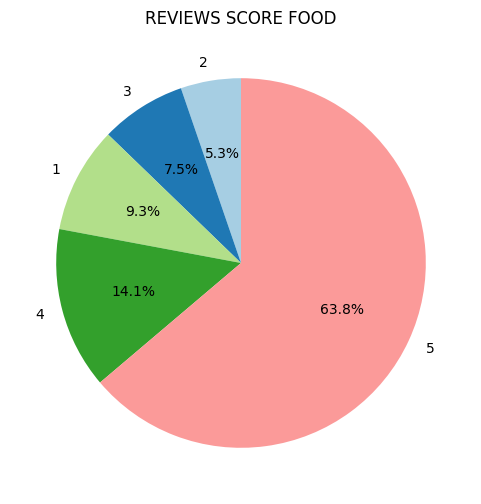

In [29]:
import matplotlib.pyplot as plt

#Memfilter hanya untuk Score dengan nilai 0,0
scoreulasan = [2,4,5]
df = df.filter(col("score").isin(scoreulasan))

#Menghitung jumlah setiap Score
score_counts = df.groupBy("score").count().orderBy(col("count"))

#Mengonversi hasil ke daftar untuk plotting
scores = [row["score"] for row in score_counts.collect()]
counts = [row["count"] for row in score_counts.collect()]

#Membuat diagram pie
plt.figure(figsize=(6,6))
plt.pie(counts, labels=scores, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title("REVIEWS SCORE FOOD")
plt.show()